In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

import numpy as np

import seaborn as sns

import plotly.express as px

from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.utils import shuffle

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Осмотр данных

Загрузим данные и посмотрим на них для начала просто глазами.

In [3]:
df_train = pd.read_csv('gold_recovery_train.csv', index_col='date', parse_dates=['date'])
df_test = pd.read_csv('gold_recovery_test.csv', index_col='date', parse_dates=['date'])
df_full = pd.read_csv('gold_recovery_full.csv', index_col='date', parse_dates=['date'])
dfs = [df_train, df_test, df_full]

In [4]:
for df in dfs:
    display(df.head())
    print(df.info())
    print('Повторяющихся строк:', df.duplicated().sum())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                     

### Проверка правильности рассчетов

Проверим, что эффективность обогащения рассчитана правильно. Для этого напишем функцию, которая будет содержать в себе формулу рассчета.

$$RECOVERY = \frac{C*(F-T)}{F*(C-T)}*100\%$$

In [5]:
def recovery(row, c, f, t):
    '''
    This function is calculating recovery as per 
    
    recovery = ((C*(F-T))/(F*(C-T)))*100%, where:
    C - the proportion of gold in concentrate after flotation/cleaning
    F - the proportion of gold in raw material before flotation/cleaning
    T - the proportion of gold in the tailings after flotation/cleaning
    
    If the denomination part is == 0, the function will return None to avoid zero division error. 
    And we will cut all values that will lay out of interval 0-100.
    
    
    '''
    C = row[c] #доля золота в концентрате после флотации
    F = row[f] #доля золота в сырье до флотации
    T = row[t] #доля золота в отвальных хвостах после флотации
    
    numerator = C * (F - T)
    denominator = F * (C - T)
    
    if denominator == 0 or (numerator / denominator * 100) < 0 or (numerator / denominator * 100) > 100:
        return 0
    
    return numerator / denominator * 100    

Еще напишем функцию, которая будет выводить нам количество нулей и пропусков в конкретном столбце, а также рисовать гистограмму и ящик с усами для этого столбца.

In [6]:
def histogram_boxplot(data,
                      xlabel=None,
                      title=None,
                      font_scale=1,
                      figsize=(16, 8),
                      bins=None):
    """ Диграмма размаха и гистограмма будут отрисованны вместе на одном кадре. 
    На графиках будут также нарисованны линия среднего и медианы.
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 1)
    figsize: size of fig (default (16, 8))
    bins: number of bins (default None / auto)
    """
    
    sns.set(font_scale=font_scale)
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        2,
        sharex=True,
        gridspec_kw={"height_ratios": (.15, .85)},
        figsize=figsize
    )
    sns.boxplot(x=data, ax=ax_box2)
    
    if bins:
        sns.histplot(x=data, ax=ax_hist2, bins=bins, kde=True)
    else:
        sns.histplot(data, ax=ax_hist2, kde=True)

    plt.axvline(x=data.mean(), linewidth=2, color='r', label="mean", alpha=0.8)
    plt.axvline(x=data.median(),
                linewidth=2,
                color='y',
                label="median",
                alpha=0.8)
    ax_hist2.legend()

    if xlabel:
        ax_hist2.set(xlabel=xlabel)
    if title:
        ax_box2.set(title=title)
    plt.show()

In [7]:
def zero_and_nones_calculation_in_column(df, column_name:str, plot=True):
    '''
    
    This function will print number of zeroes and Nones in the column. Also it will show destribution plot as per default,
    but plot can be switched off by third argument of the function.
    
    '''
    clmn_length = df[column_name].shape[0]
    zeroes = df[column_name].loc[df[column_name]==0].count()
    nans = df[column_name].isna().sum()
    
    print(f'Всего в столбце {column_name} {clmn_length} строк')
    print(f'В столбце {column_name} содержится {zeroes} нулей, что составляет {zeroes/clmn_length:.2%}')
    print(f'В столбце {column_name} содержится {nans} пропусков, что составляет {nans/clmn_length:.2%}')
    
    if plot:
        histogram_boxplot(df[column_name])

Посмотрим, что у нас в столбце `rougher.output.recovery`.

Всего в столбце rougher.output.recovery 16860 строк
В столбце rougher.output.recovery содержится 320 нулей, что составляет 1.90%
В столбце rougher.output.recovery содержится 2573 пропусков, что составляет 15.26%


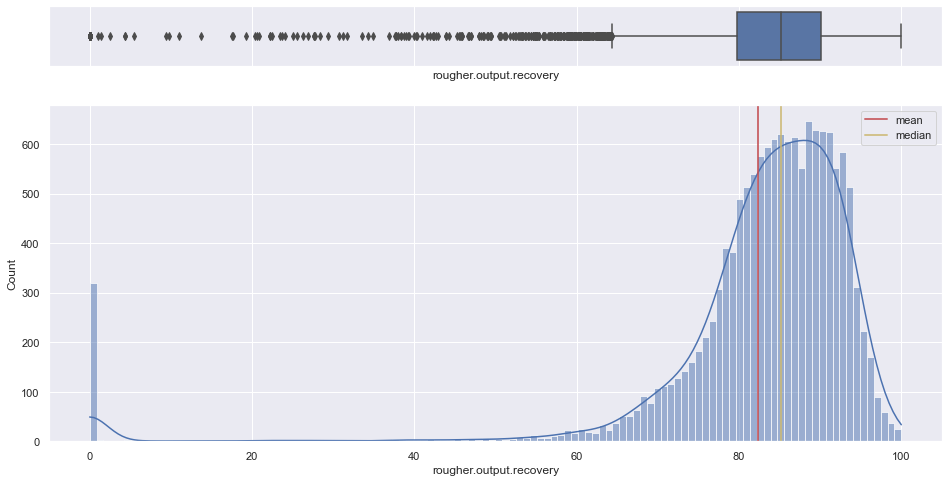

In [8]:
zero_and_nones_calculation_in_column(df_train, 'rougher.output.recovery')

Применим нашу функцию подсчета эфективности обогащения.

In [9]:
df_train['recovery_calculated'] = df_train.apply(recovery, 
                                                 args=('rougher.output.concentrate_au',
                                                                'rougher.input.feed_au',
                                                                'rougher.output.tail_au'), 
                                                 axis=1)

In [10]:
zero_and_nones_calculation_in_column(df_train, 'recovery_calculated', False)

Всего в столбце recovery_calculated 16860 строк
В столбце recovery_calculated содержится 643 нулей, что составляет 3.81%
В столбце recovery_calculated содержится 2250 пропусков, что составляет 13.35%


В результате пересчёта у нас несколько увеличилось количество нулей, но уменьшилось количество пропусков. Эти изменения не должны сильно повлиять на наш анализ.

Сравним распределения и выведем значение `MAE`.

In [11]:
def mae(column_1, column_2):
    plt.figure(figsize=(16 , 8))
    sns.kdeplot(column_1, color='b', shade=True, label=column_1.name)
    sns.kdeplot(column_2, color='r', shade=True, label=column_2.name)
    plt.xlabel('Value')
    plt.ylabel('Probability density')
    plt.show()
    print(abs(column_1-column_2).mean())

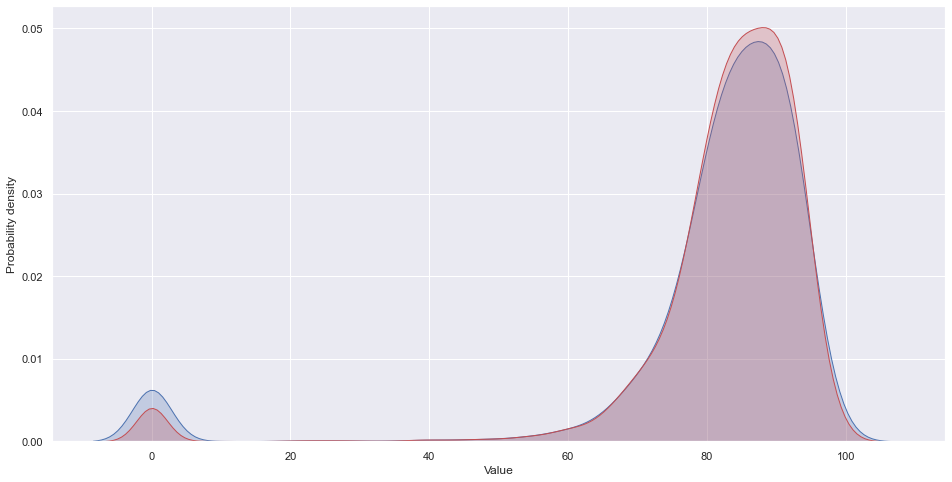

9.303415616264301e-15


In [12]:
mae(df_train['recovery_calculated'], df_train['rougher.output.recovery'])

Как видно из графика наши расчетные значения и значения из таблицы практически идентичны, а `MAE` стремится к нулю. Это значит что recovery посчитан верно.

### Сравнение признаков в выборках

По условию:

    "Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков."

Давайте проверим, каких столбцов нет в тестовой выборке, но они есть в обучающей.

In [13]:
set(df_train.columns) - set(df_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'recovery_calculated',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_

Как мы видим в тестовой выборке отсутствуют признаки `output` - это целевые признаки. Так же нет расчётныx характеристик для этапа флотации (`rougher.calculation`) - видимо, это как раз те данные, которые расчитываются позже.

### Предобработка данных

У нас уже есть функция, которая выводит количество нулей и пропущенных данных в конкретном столбце. Напишем еще одну, которая будет показывать сколько у нас пропусков в каждом столбце таблицы в абсолютном и процентном выражениях.

In [14]:
def how_many_na(df):
    na_info = (df.isna() | df.isnull()).sum()
    res = (pd.concat([na_info / df.shape[0] * 100, na_info], axis=1,  keys=['Percent', 'Counts'])
           .sort_values('Percent', ascending=False))
    return res

In [15]:
how_many_na(df_train).head(15)

,Percent,Counts
rougher.output.recovery,15.260973,2573
recovery_calculated,13.345196,2250
rougher.output.tail_ag,13.345196,2250
rougher.output.tail_sol,13.339265,2249
rougher.output.tail_au,13.339265,2249
secondary_cleaner.output.tail_sol,11.779359,1986
rougher.input.floatbank11_xanthate,11.293001,1904
final.output.recovery,9.021352,1521
primary_cleaner.input.sulfate,7.752076,1307
primary_cleaner.input.depressant,7.485172,1262


In [16]:
how_many_na(df_test).head(15)

,Percent,Counts
rougher.input.floatbank11_xanthate,6.028005,353
primary_cleaner.input.sulfate,5.157104,302
primary_cleaner.input.depressant,4.849727,284
rougher.input.floatbank10_sulfate,4.388661,257
primary_cleaner.input.xanthate,2.834699,166
rougher.input.floatbank10_xanthate,2.100410,123
rougher.input.feed_sol,1.144126,67
rougher.input.floatbank11_sulfate,0.939208,55
rougher.input.feed_rate,0.683060,40
secondary_cleaner.state.floatbank3_a_air,0.580601,34


Как мы видим в таблице с обучающим набором данных пропуски довольно существенны. Пока оставим все как есть, так как заполнение пропусков будем организовывать при подготовке обучения.

Для разбиения датасета и понимания технологического процесса воспользуемся картинкой, любезно предоставленной одним из моих коллег.

![title](photo.jpg)

Из анализа построения технологического процесса видно, что результаты процессов флотации и очистки можно разделить на два независимых этапа.

## Анализ данных

Проверим изменения концентраций матллов (Au, Ag, Pb) на разных стадиях очистки в полезном выходе и в хвостах.

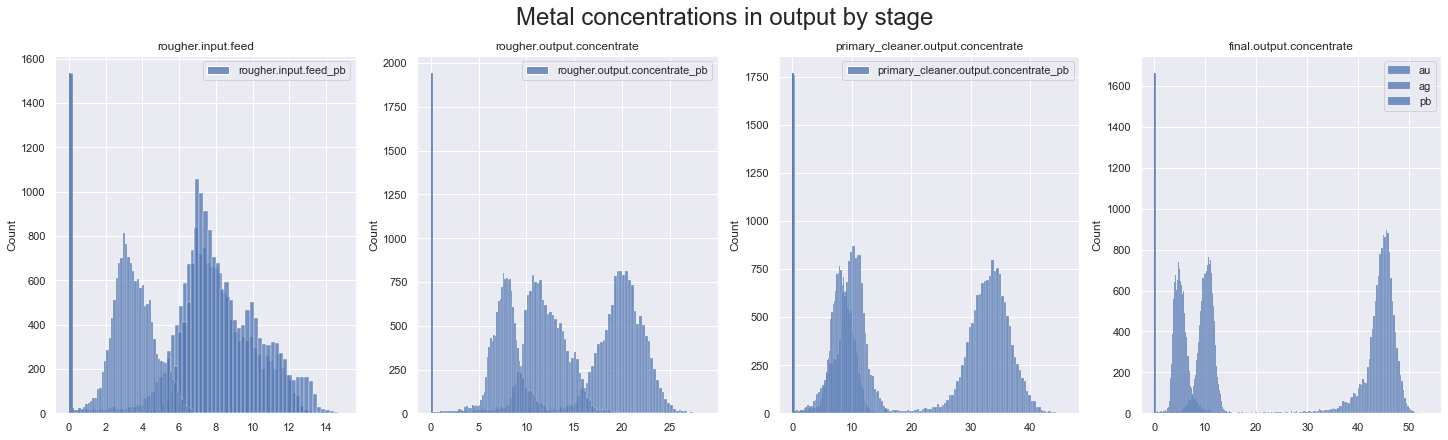

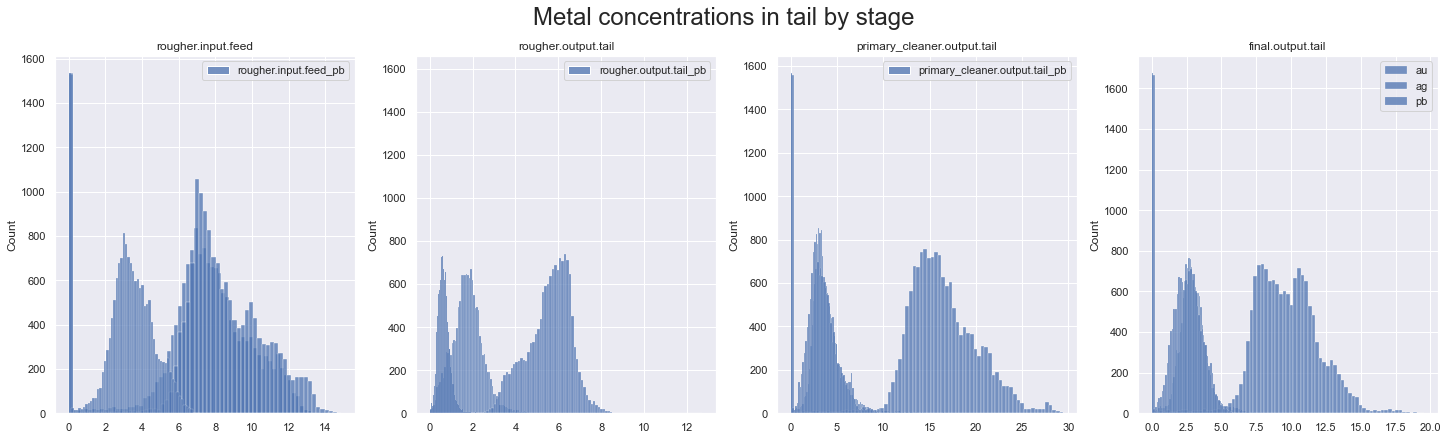

In [17]:
process = [
    'rougher.input.feed', 'rougher.output.concentrate',
    'primary_cleaner.output.concentrate', 'final.output.concentrate'
]

process_tail = [
    'rougher.input.feed', 'rougher.output.tail', 'primary_cleaner.output.tail',
    'final.output.tail'
]

metals = ['au', 'ag', 'pb']

fig, axs = plt.subplots(1,
                        len(process),
                        figsize=(20, 6),
                        constrained_layout=True)
fig.suptitle('Metal concentrations in output by stage', fontsize=24)

for stage, ax in zip(process, axs):
    ax.set_title(stage)
    for metal in metals:
        cols = df_train.columns.str.contains(stage + '_' + metal)
        sns_ax = sns.histplot(df_train.loc[:, cols].dropna(),
                              label=metal,
                              ax=ax)
plt.legend()

fig, axs = plt.subplots(1, 4, figsize=(20, 6), constrained_layout=True)
fig.suptitle('Metal concentrations in tail by stage', fontsize=24)

for stage, ax in zip(process_tail, axs):
    ax.set_title(stage)
    for metal in metals:
        cols = df_train.columns.str.contains(stage + '_' + metal)
        sns_ax = sns.histplot(df_train.loc[:, cols].dropna(),
                              label=metal,
                              ax=ax)
plt.legend()

plt.show()

Как мы видим, по мере прохождения исходного материала последовательно по стадиям технологического процесса, доля золота в концентрате возрастает от 7.5 до 45-50. И соответственно уменбшается в хвостах.

Проверим распределение размеров гранул сырья.

In [18]:
def kde_plot_two_destributions(series1, series2, series_name1, series_name2):
    '''
    This functions will plot distribution of two series on the same axis and will show mean lines as well.
    '''
    plt.subplots(figsize=(16,8))
    ax1 = sns.kdeplot(series1, shade=True, color='b', label=series_name1)
    ax2 = sns.kdeplot(series2, shade=True, color='r', label=series_name2)
    
    print(f'Среднее для {series_name1} равно {series1.mean()}')
    print(f'Среднее для {series_name2} равно {series2.mean()}')

Среднее для Train равно 7.29728487125721
Среднее для Test равно 7.264651292245429


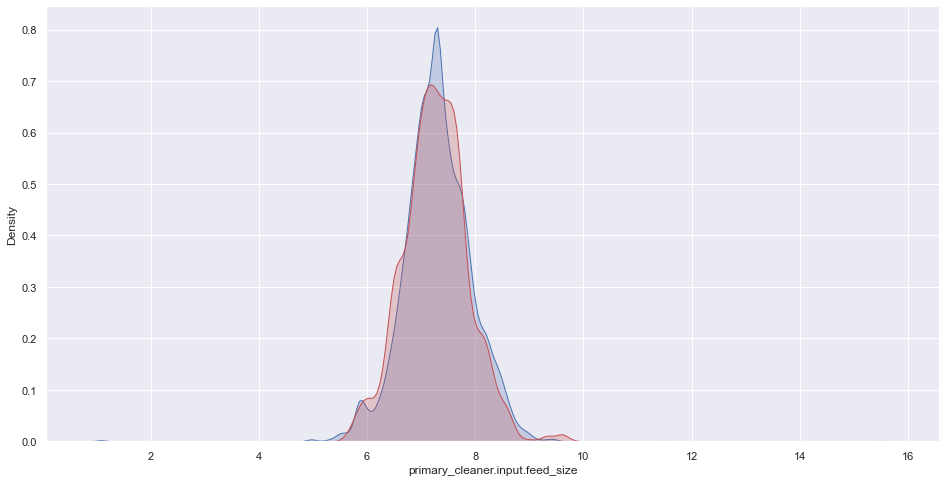

In [19]:
kde_plot_two_destributions(df_train['primary_cleaner.input.feed_size'],
                           df_test['primary_cleaner.input.feed_size'], 'Train',
                           'Test')

Как видно из графика, распределения похожи и средние значения лежат очень близко друг к другу. 

Проверим суммарную концентрацию веществ на разных стадиях технологического процесса на наличие аномалий в данных. Для этого возьмем датасет `full`, в котором у нас есть вся информация по каждому процессу.

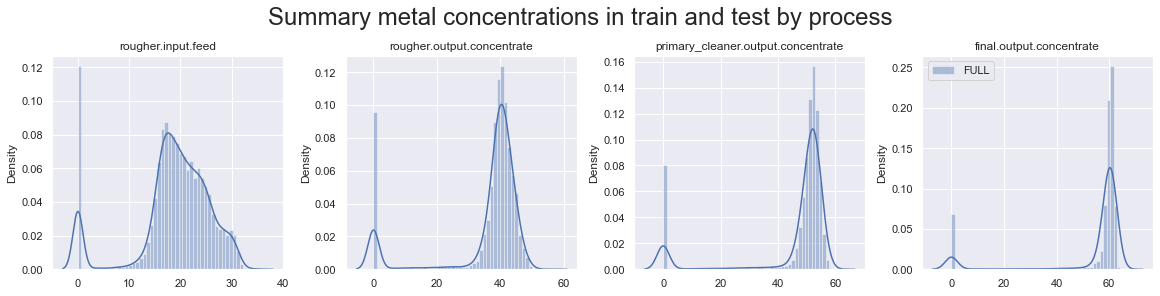

In [20]:
fig, axs = plt.subplots(1, len(process), figsize=(16, 4), constrained_layout=True)
fig.suptitle('Summary metal concentrations in train and test by process', fontsize=24)


ag_stages = []
au_stages = []
pb_stages = []
for stage, ax in zip(process, axs):
    ag_stages.append(stage+ '_ag')
    au_stages.append(stage+ '_au')
    pb_stages.append(stage+ '_pb')
    ax.set_title(stage)    
    sum_full = df_full[stage+ '_ag'] + df_full[stage+ '_au'] + df_full[stage+ '_pb']
    sns.distplot(sum_full.dropna(), label='FULL', ax=ax) 

plt.legend()
plt.show()

На графиках видно, что на каждом этапе есть довольно много нулевых значений. Непонятно с чем это связано и как интерпретировать. Так как мы выводили сумму по всем процессам и получали ноль, то возможно просто в этой строке занесены данные для каких-то других параметров, а концентрацию металлов не вносили или ставили нулевую. Для предсказания результатов технологических процессов скорее всего такие строки не будут нести никакой информации. Удалим такие строки из ниших данных.

In [21]:
def excluding_anomalies(df, df_name, stage_list):
    print('+='*50)
    print(f'Размер датафрейма "{df_name}" до обработки {df.shape}')
    for stage in zip(*(stage_list)):
        try:
            df = df.loc[(df[stage[0]]+df[stage[0]]+df[stage[0]])!=0]
        except KeyError:
            pass
    print(f'Размер датафрейма "{df_name}" после обработки {df.shape}')
    print('+='*50, '\n\n')
    return df

In [22]:
stage_list = [ag_stages, au_stages, pb_stages]

In [23]:
df_train = excluding_anomalies(df_train, 'Обучающая выборка', stage_list)
df_test = excluding_anomalies(df_test, 'Тестовая выборка', stage_list)
df_full = excluding_anomalies(df_full, 'Полная выборка', stage_list)

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
Размер датафрейма "Обучающая выборка" до обработки (16860, 87)
Размер датафрейма "Обучающая выборка" после обработки (15076, 87)
+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+= 


+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
Размер датафрейма "Тестовая выборка" до обработки (5856, 52)
Размер датафрейма "Тестовая выборка" после обработки (5487, 52)
+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+= 


+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
Размер датафрейма "Полная выборка" до обработки (22716, 86)
Размер датафрейма "Полная выборка" после обработки (20336, 86)
+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+= 




Давайте посмотрим как было произведено разбиение на обучающую и тестовую выборки.

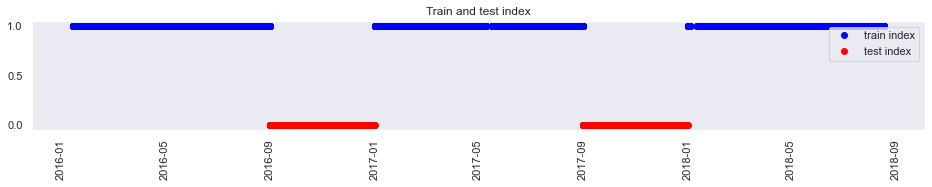

In [24]:
temp = np.ones(df_train.shape[0])
plt.figure(figsize=(16 , 2))
plt.plot(pd.Series(data=temp, index=df_train.index), 'bo', c='blue', label='train index')

temp = np.zeros(df_test.shape[0])
plt.plot(pd.Series(data=temp, index=df_test.index), 'bo', c='red', label='test index')

plt.grid()
plt.title('Train and test index')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Видно, что для тестовой выборки взяли два отрезка по 3 месяца в конце каждого года.

## Модель

Для оценки моделей мы будем использовать метрику качества `sMAPE`, которую будем вычислять по следующим формулам:

$$sMAPE=\frac{1}{N}\sum_{i=1}^N\frac{\mid{y_{i}}-\hat{y_{i}}\mid}{\left(\mid{y_{i}}\mid+\mid\hat{y_{i}}\mid\right)/2}*100\%$$

$$Итоговое\ sMAPE=25\%*sMAPE(rougher)+75\%*sMAPE(final)$$

Напишем функцию для подсчета `sMAPE`, которую позже будем использовать как скорер.

In [25]:
def sMAPE(y_true, y_pred):
    return ((abs(y_true-y_pred)/((abs(y_true)+abs(y_pred))*0.5))*100).mean()

def final_sMAPE(smape_rougher, smape_final):
    return (0.25 * smape_rougher) + (0.75 * smape_final)

In [26]:
neg_smape = make_scorer(sMAPE, greater_is_better=False)

Для решения задачи мы попробуем обучить несколько моделей:
- RandomForestRegressor
- LinearRegressor

Для каждой из моделей мы будем подбирать параметры методом кросс-валидации и проверять их эффективность по нашей метрике `sMAPE`.

Перейдем к машинному обучению. Сначала заполним пропуски в данных значениями в предыдущей строке, так как по условию соседние по времени параметры часто схожи. 

In [27]:
df_test = df_test.join(df_full.loc[df_full.index.intersection(df_test.index),:][['final.output.recovery','rougher.output.recovery']])

In [28]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')

- Удалим из обучающей выборки признаки которых нет в тестовой, чтобы наша модель не искала их в момент предсказания
- Исходя из диаграммы технологичсекого процесса будет логично предсказывать отдельно `recovery` для процесса флотации и последующих очисток, так как эти процессы независимы. Разделим датасет на 2 части `rougher` и `cleaner`.
- Разделим данные не целевой признак и все остальные

In [29]:
X_train = df_train[df_test.columns]

rougher_columns = X_train.columns.str.contains('rougher')

X_train_rougher = X_train.loc[:, rougher_columns]
X_train_rougher = X_train_rougher.drop(['rougher.output.recovery'], axis=1)

X_test_rougher = df_test.loc[:, rougher_columns]
X_test_rougher = X_test_rougher.drop(['rougher.output.recovery'], axis=1)

y_train_rougher = df_train['rougher.output.recovery']
y_test_rougher = df_test['rougher.output.recovery']

final_columns = X_train.columns.str.contains('cleaner|final')

X_train_cleaner = X_train.loc[:, final_columns]

X_train_cleaner = X_train_cleaner.drop(['final.output.recovery'], axis=1)
X_test_cleaner = df_test.loc[:, final_columns]
X_test_cleaner = X_test_cleaner.drop(['final.output.recovery'], axis=1)

y_train_cleaner = df_train['final.output.recovery']
y_test_cleaner = df_test['final.output.recovery']

### Dummy baseline

Перед тем как приступать непосредственно к МО посмотрим будут ли достаточно эффективны предсказания, если мы на все ответы будем выдавать среднее значение.

In [30]:
rougher_dclf = pd.Series([y_test_rougher.mean()] * len(y_test_rougher), index=y_test_rougher.index)
cleaner_dclf = pd.Series([y_test_cleaner.mean()] * len(y_test_cleaner), index=y_test_cleaner.index)

In [31]:
rougher_dclf_smape = sMAPE(rougher_dclf, y_test_rougher)
cleaner_dclf_smape = sMAPE(cleaner_dclf, y_test_cleaner)

final_sMAPE(rougher_dclf_smape, cleaner_dclf_smape)

7.694507346178531

In [32]:
rougher_dclf = pd.Series([y_train_rougher.mean()] * len(y_test_rougher), index=y_test_rougher.index)
cleaner_dclf = pd.Series([y_train_cleaner.mean()] * len(y_test_cleaner), index=y_test_cleaner.index)

In [33]:
rougher_dclf_smape = sMAPE(rougher_dclf, y_test_rougher)
cleaner_dclf_smape = sMAPE(cleaner_dclf, y_test_cleaner)

final_sMAPE(rougher_dclf_smape, cleaner_dclf_smape)

8.207836305728495

### RandomForestRegressor

Теперь подготовим функцию для подбора параметров модели Случайного Леса. Это нужно чтобы обучить две отдельные модели для `rougher` и `cleaner`.

In [34]:
def random_forest_adjustment(X, y, scorer):
    estimator = RandomForestRegressor(random_state=42, n_jobs=-1)
    parameters = {"n_estimators" : [10, 25, 50],
                  "max_depth": range(1,5,2),
                  "max_features" : ["log2", "sqrt"], 
                  "bootstrap" : [True, False],
                  'min_samples_leaf': range(1,8),
                  'min_samples_split': range(2,10,1)
                 }


    grid = GridSearchCV(estimator, parameters, scoring=scorer, cv=3)
    grid.fit(X, y)
    forest = grid.best_estimator_

    return forest    

Теперь обучим две модели и посмотрим на финальный показатель sMAPE.

In [35]:
%%time

rougher_est_rfr = random_forest_adjustment(X_train_rougher, y_train_rougher, neg_smape)
cleaner_est_rfr = random_forest_adjustment(X_train_cleaner, y_train_cleaner, neg_smape)

rougher_rfr_smape = sMAPE(rougher_est_rfr.predict(X_test_rougher), y_test_rougher)

cleaner_rfr_smape = sMAPE(cleaner_est_rfr.predict(X_test_cleaner), y_test_cleaner)

final_sMAPE(rougher_rfr_smape, cleaner_rfr_smape)

Wall time: 21min 5s


8.145780471078147

Final sMAPE для модели Случайного леса = 8.145780471078151

### Линейная регрессия

Для модели линейной регрессии у нас не так много параметров, которые мы можем подбирать. Но тут есть специфика в том, что нам необходимо промасштабировать данные и проверить их на мультиколениарность перед началом обучения моделей.

Напишем функцию которая будет возвращать таблицу пар столбцов, корреляция которых выше заданого порога. 

In [36]:
def correlations_table(df, threshold):
    cor_matrix = df.corr()
    threshold = threshold
    important_corrs = (cor_matrix[abs(cor_matrix) > threshold][cor_matrix != 1]).unstack().dropna().to_dict()
    
    unique_important_corrs = pd.DataFrame(list(set([(tuple(sorted(key)), important_corrs[key]) for key in important_corrs])),
                                          columns=['attribute pair', 'correlation'])
    
    unique_important_corrs = unique_important_corrs.iloc[abs(unique_important_corrs['correlation']).argsort()[::-1]]
    unique_important_corrs.reset_index(drop=True, inplace=True)
    
    return unique_important_corrs

Применим нашу функцию на обущающих выборках.

In [37]:
rougher_correlations = correlations_table(X_train_rougher, 0.9)
cleaner_correlations = correlations_table(X_train_cleaner, 0.9)

In [38]:
display(rougher_correlations)
display(cleaner_correlations)

,attribute pair,correlation
0,"(rougher.state.floatbank10_d_level, rougher.st...",0.971041
1,"(rougher.state.floatbank10_b_level, rougher.st...",0.968469
2,"(rougher.state.floatbank10_b_level, rougher.st...",0.967309
3,"(rougher.state.floatbank10_b_level, rougher.st...",0.965672
4,"(rougher.state.floatbank10_c_level, rougher.st...",0.965549
5,"(rougher.state.floatbank10_c_level, rougher.st...",0.965308
6,"(rougher.state.floatbank10_b_air, rougher.stat...",0.952791
7,"(rougher.state.floatbank10_e_air, rougher.stat...",0.952670
8,"(rougher.state.floatbank10_b_air, rougher.stat...",0.948450
9,"(rougher.state.floatbank10_c_air, rougher.stat...",0.938122


,attribute pair,correlation
0,"(primary_cleaner.state.floatbank8_a_air, prima...",0.986180
1,"(primary_cleaner.state.floatbank8_a_level, pri...",0.983685
2,"(primary_cleaner.state.floatbank8_b_air, prima...",0.978306
3,"(primary_cleaner.state.floatbank8_a_air, prima...",0.978141
4,"(primary_cleaner.state.floatbank8_a_level, pri...",0.969136
5,"(primary_cleaner.state.floatbank8_b_level, pri...",0.968854
6,"(secondary_cleaner.state.floatbank5_a_level, s...",0.938848
7,"(secondary_cleaner.state.floatbank2_a_level, s...",0.925225
8,"(secondary_cleaner.state.floatbank2_a_air, sec...",0.905387


Следущая функция будет проходиться по сильно скоррелированным признакам и выкидывать из выборки тот столбец из пары, у которого ниже корреляция с целевым признаком.

In [39]:
def dropping_correleted_columns(main_df, X, correlations_table, y_name):
    
    correlations_pairs = correlations_table.loc[:, 'attribute pair'] #make series with attribute pairs
    
    columns_to_drop = []
    for i in range(len(correlations_pairs)):
        if abs(main_df[correlations_pairs[i][0]].corr(main_df[y_name])) < abs(main_df[correlations_pairs[i][1]].corr(main_df[y_name])):
            columns_to_drop.append(correlations_pairs[i][0])
        else:
            columns_to_drop.append(correlations_pairs[i][1])
    
    return columns_to_drop

Применим нашу функцию для `X_train_rougher`, `X_train_cleaner`,`X_test_cleaner` и `X_test_rougher` поочередно.

In [40]:
before = set(X_train_cleaner.columns)

columns_to_drop = dropping_correleted_columns(df_train, X_train_cleaner, cleaner_correlations, 'final.output.recovery')
X_train_cleaner.drop(list(set(columns_to_drop)), axis=1, inplace=True)
X_test_cleaner.drop(list(set(columns_to_drop)), axis=1, inplace=True)

print(before - set(X_train_cleaner.columns))

{'primary_cleaner.state.floatbank8_b_air', 'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank2_b_air', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_c_level', 'secondary_cleaner.state.floatbank5_a_level'}


In [41]:
before = set(X_train_rougher.columns)

columns_to_drop = dropping_correleted_columns(df_train, X_train_rougher, rougher_correlations, 'rougher.output.recovery')
X_train_rougher.drop(list(set(columns_to_drop)), axis=1, inplace=True)
X_test_rougher.drop(list(set(columns_to_drop)), axis=1, inplace=True)

print(before - set(X_train_rougher.columns))

{'rougher.state.floatbank10_f_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_b_air'}


Осталось произвести масштабирование признаков. Для этого возпользуемся `StandartScaler`.

In [42]:
rougher_scaler = StandardScaler()
cleaner_scaler = StandardScaler()

rougher_clmns = list(X_train_rougher.columns)
cleaner_clmns = list(X_train_cleaner.columns)

rougher_scaler.fit(X_train_rougher[rougher_clmns])
cleaner_scaler.fit(X_train_cleaner[cleaner_clmns])

X_train_rougher[rougher_clmns] = rougher_scaler.transform(X_train_rougher[rougher_clmns])
X_train_cleaner[cleaner_clmns] = cleaner_scaler.transform(X_train_cleaner[cleaner_clmns])

X_test_rougher[rougher_clmns] = rougher_scaler.transform(X_test_rougher[rougher_clmns])
X_test_cleaner[cleaner_clmns] = cleaner_scaler.transform(X_test_cleaner[cleaner_clmns])

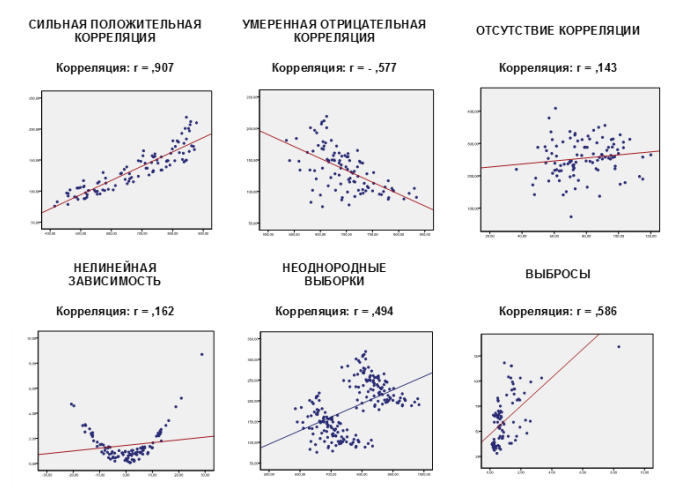

Данные подготовлены и можно запускать обучение линейной регрессии.

In [43]:
rougher_est_lr = LinearRegression(n_jobs=-1)
cleaner_est_lr = LinearRegression(n_jobs=-1)

rougher_est_lr.fit(X_train_rougher, y_train_rougher)
cleaner_est_lr.fit(X_train_cleaner, y_train_cleaner)

LinearRegression(n_jobs=-1)

Проверим результат обучения наших моделей линейной регрессии на тестовых данных.

In [44]:
rougher_lr_predictions = rougher_est_lr.predict(X_test_rougher)
cleaner_lr_predictions = cleaner_est_lr.predict(X_test_cleaner)

rougher_lr_smape = sMAPE(y_test_rougher, rougher_lr_predictions)
cleaner_lr_smape = sMAPE(y_test_cleaner, cleaner_lr_predictions)

final_sMAPE(rougher_lr_smape, cleaner_lr_smape)

7.88626198157564

## Вывод:

Данные которые мы получили для работы сильно зашумлены и для их обработки было бы не плохо иметь знания в доменной области. Так же не понятно, как они собираются в единую таблицу и на каких этапах. Такая информация может сильно улучшить предсказательную силу моделей, так как возможно нам удалось бы строить предсказания более прицельно.

Тем не менее, мы получили довольно маленькое значение нашей финальной метрики, при использовании модели линейной регрессии.

К сожалению наша самая лучшая модель выдает предсказания хуже, чем просто среднее значение для столбца. Это несомненно обидно, но без глубокого погружения в доменную область, а, главное, понимания того, как формируются данные очень сложно точечно очистить датасет и настроить модели. Визуальный осмотр в Excel показал, например, что в строках, в которых суммараная концентрация металлов после какого-то процесса равна нулю, так же нулевые значения во многих других столбцах. Есть предположение, что в таких строках содержаться только расчетные данные и они появляются в таблица в момент обработки данных реального процесса. Если такое предположение верно, значит нам надо понимать, как и на каких стадиях данные появляются в таблице. Так же такие вещи могут быть результатом объединения нескольких таблиц на стороне заказчика. То есть нам постарались дать максимально много данных, но на самом деле не все из них полезны для наших целей.